In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amanshaikh1322","key":"a5243611a0f6a85823b31737ad6b3caa"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vaishnaviasonawane/indian-sign-language-dataset
!unzip /content/indian-sign-language-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/V/819.jpg          
  inflating: data/V/82.jpg           
  inflating: data/V/820.jpg          
  inflating: data/V/821.jpg          
  inflating: data/V/822.jpg          
  inflating: data/V/823.jpg          
  inflating: data/V/824.jpg          
  inflating: data/V/825.jpg          
  inflating: data/V/826.jpg          
  inflating: data/V/827.jpg          
  inflating: data/V/828.jpg          
  inflating: data/V/829.jpg          
  inflating: data/V/83.jpg           
  inflating: data/V/830.jpg          
  inflating: data/V/831.jpg          
  inflating: data/V/832.jpg          
  inflating: data/V/833.jpg          
  inflating: data/V/834.jpg          
  inflating: data/V/835.jpg          
  inflating: data/V/836.jpg          
  inflating: data/V/837.jpg          
  inflating: data/V/838.jpg          
  inflating: data/V/839.jpg          
  inflating: data/V/84.jpg           
  inflating: data/V/840.jpg          

In [3]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [4]:
# Processing training data
# -> appending labels in a list 'train_labels'
# -> appending images in a list 'train_images'

train_images = []
train_labels = []
data_path='/content/data'
shape = (256,256)  

count=50
for filename in os.listdir(data_path):
  count=50
  for imagename in os.listdir(data_path+'/'+filename):
    train_labels.append(filename)
    if imagename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(data_path,filename,imagename))
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        train_images.append(img)
    count-=1
    if(count==0):
      break

# Converting train_images to array
train_images = np.array(train_images)
train_labels = pd.get_dummies(train_labels).values

(1750, 256, 256, 3)
(1750, 35)
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


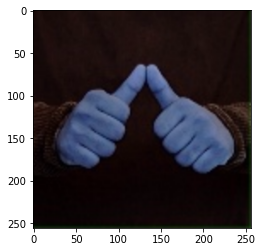

In [5]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[100])
plt.imshow(train_images[100])

In [6]:
# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [7]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(256,256,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(35,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [8]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 30)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 30)      8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 30)        8

In [9]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
27/27 [==============================] - 19s 207ms/step - loss: 4.6012 - acc: 0.0442 - val_loss: 3.2789 - val_acc: 0.0708
Epoch 2/50
27/27 [==============================] - 4s 156ms/step - loss: 2.9076 - acc: 0.1349 - val_loss: 2.6458 - val_acc: 0.2009
Epoch 3/50
27/27 [==============================] - 4s 156ms/step - loss: 2.2420 - acc: 0.2851 - val_loss: 2.0709 - val_acc: 0.3539
Epoch 4/50
27/27 [==============================] - 4s 157ms/step - loss: 1.8833 - acc: 0.4238 - val_loss: 1.7865 - val_acc: 0.5068
Epoch 5/50
27/27 [==============================] - 4s 158ms/step - loss: 1.4602 - acc: 0.5579 - val_loss: 1.3656 - val_acc: 0.5799
Epoch 6/50
27/27 [==============================] - 4s 160ms/step - loss: 1.1908 - acc: 0.6372 - val_loss: 1.2028 - val_acc: 0.6941
Epoch 7/50
27/27 [==============================] - 4s 159ms/step - loss: 0.9985 - acc: 0.7248 - val_loss: 0.9855 - val_acc: 0.7306
Epoch 8/50
27/27 [==============================] - 4s 159ms/step - loss: 0

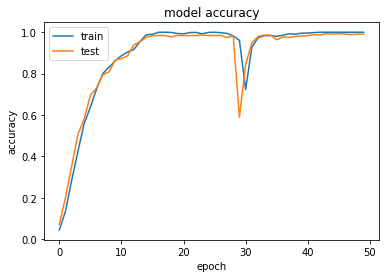

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

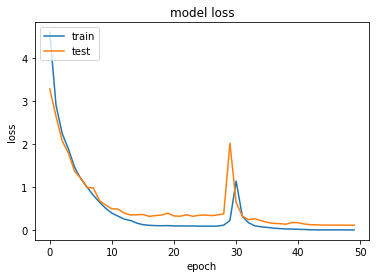

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

14/14 [==============================] - 1s 60ms/step - loss: 0.1111 - acc: 0.9909
[0.11106625944375992, 0.990867555141449]


index :-  2
Predicted :-  3
Actual :-  [[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Actual :-  3


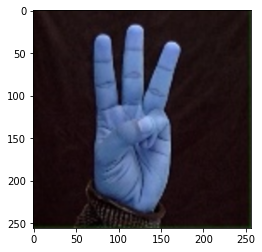

In [13]:
# Testing predictions and the actual label
start=200
end=201
checklabel = train_labels[start:end] #because train_labels[150] gives only single list while train_labels[150:151] returns list containing single list i.e [[.........]]
# This kind of input is required by predict function of model

predict = model.predict(train_images[start:end])
# print(predict)

output = {0:'1',1:'2',2:'3',3:'4',4:'5',5:'6',6:'7',7:'8',8:'9',9:'A',10:'B',11:'C',12:'D',13:'E',14:'F',15:'G',16:'H',17:'I',18:'J',19:'K',20:'L',21:'M',22:'N',23:'O',24:'P',25:'Q',26:'R',27:'S',28:'T',29:'U',30:'V',31:'W',32:'X',33:'Y',34:'Z'}

print("index :- ",np.argmax(predict))
print("Predicted :- ",output[np.argmax(predict)])
count=0
for val in checklabel[0]:
  if val==1:
    break
  count+=1

print("Actual :- ",checklabel)
print("Actual :- ",output[count])
plt.imshow(train_images[start])


In [14]:
#Testing On random image

data_path='/content/data'
class_name='Z'
file_name='1100.jpg'
shape = (256,256)

img = cv2.imread(os.path.join(data_path,class_name,file_name))
        
# Resize all images to a specific shape
img = cv2.resize(img,shape)

# Converting train_images to array
new_list=[]
new_list.append(img)
new_img = np.array(new_list)


# print("\ntrain image :-\n",train_images[200:201])
# print("\nnew list :-\n",new_img)



new_predict = model.predict(new_img)

print("Predicted :- ",output[np.argmax(new_predict)])




Predicted :-  Z


In [15]:
model.save('model.h5')